# Parameter sweeps for Hyperbolic discounting model, run with multiple experiment design types
This notebook compares the ability of various experiment design protocols to infer the discount rates (from Hyperbolic time discounting) of a simulated observer.
For each experiment design protocol, we conduct a parameter sweep.
We then plot the median and +/- 95% CI's of the estimated logk parameter.

In [1]:
# Point Python to the path where we have installed the bad and darc packages
import sys
sys.path.insert(0, '/Users/btvincent/git-local/darc-experiments-python')

In [2]:
import pandas as pd
import numpy as np

import darc
from darc.delayed import models
from darc.designs import Kirby2009, Frye, DARCDesign, Griskevicius2011delay, Koffarnus_Bickel
from dev.darc_parameter_recovery import parameter_recovery_sweep

In [3]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
%config InlineBackend.figure_format = 'retina'

In [4]:
N = 70
θsweep = pd.DataFrame.from_dict({'logk': np.linspace(-8, -1, num=N), 
                                 'α': np.ones(N) * 2})

In [5]:
target_param_name = 'logk'

# KIRBY -----------------------------------------------------------------
max_trials = 27
design_thing = Kirby2009()
model = models.Hyperbolic(n_particles=5000)
θ_estimated_kirby = parameter_recovery_sweep(θsweep, model, design_thing, target_param_name)
n_trials_kirby = 27

# FRYE -----------------------------------------------------------------
design_thing = Frye(DB=[7, 30, 365/2, 365], trials_per_delay=5)
model = models.Hyperbolic(n_particles=5000)
θ_estimated_frye = parameter_recovery_sweep(θsweep, model, design_thing, target_param_name)
n_trials_frye = 20

# Griskevicius -----------------------------------------------------------------
design_thing = Griskevicius2011delay()
model = models.Hyperbolic(n_particles=5000)
θ_estimated_griskevicius = parameter_recovery_sweep(θsweep, model, design_thing, target_param_name)
n_trials_griskevicius = 7

# Koffarnus & Bickel ----------------------------------------------------------
design_thing = Koffarnus_Bickel()
model = models.Hyperbolic(n_particles=5000)
θ_estimated_koffarnus = parameter_recovery_sweep(θsweep, model, design_thing, target_param_name)
n_trials_koffarnus = 5

# DARC -----------------------------------------------------------------
max_trials = 20
# design_thing = DARCDesign(max_trials=max_trials,
#                           RA=list(np.arange(5, 99+1, 1)),
#                           random_choice_dimension='DB')
design_thing = DARCDesign(max_trials=max_trials,
                          RA=list(np.arange(5, 99+1, 1)))
model = models.Hyperbolic(n_particles=5000)
θ_estimated_darc = parameter_recovery_sweep(θsweep, model, design_thing, target_param_name)
n_trials_darc = max_trials

starting parameter recovery sweep
starting parameter recovery sweep
starting parameter recovery sweep
starting parameter recovery sweep
starting parameter recovery sweep


/Users/btvincent/git-local/darc-experiments-python/bad/optimisation.py:153: RuntimeWarning: invalid value encountered in true_divide
  (n_times_sampled+n_times_sampled_iter))
/Users/btvincent/git-local/darc-experiments-python/bad/optimisation.py:226: RuntimeWarning: invalid value encountered in true_divide
  (n_times_sampled + n_times_sampled_iter))


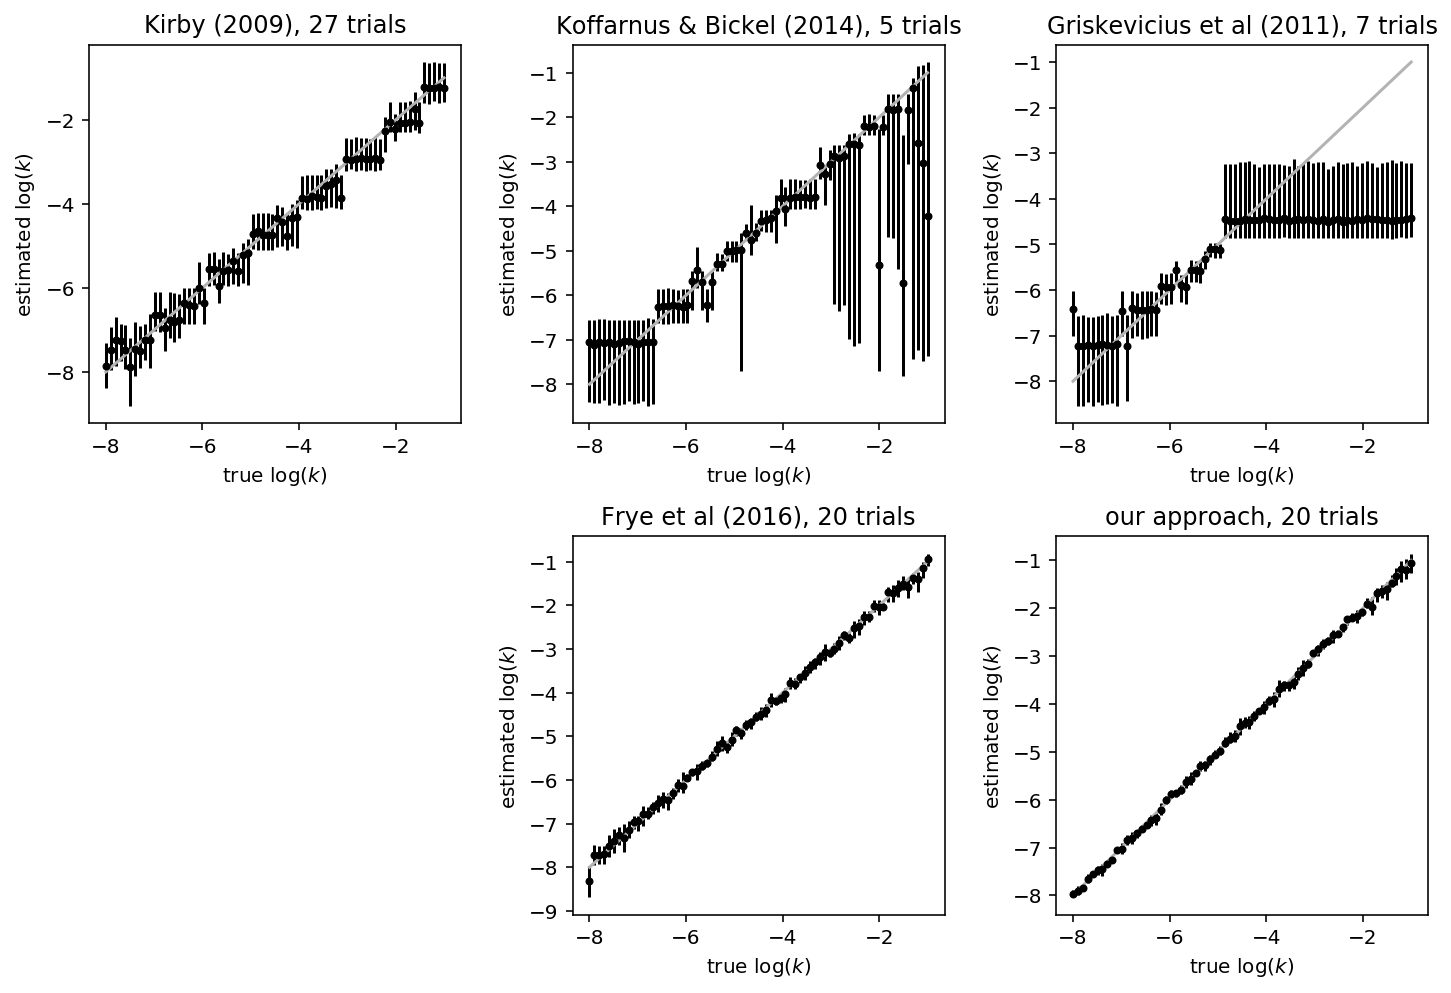

In [9]:
fig1 = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(2, 3)

ax0 = fig1.add_subplot(gs[0,0])
ax1 = fig1.add_subplot(gs[0,1])
ax2 = fig1.add_subplot(gs[0,2])
#ax3 = fig1.add_subplot(gs[1,0])
ax4 = fig1.add_subplot(gs[1,1])
ax5 = fig1.add_subplot(gs[1,2])
#axes = [ax0, ax1, ax2, ax3]

def my_errorbar(ax, θsweep, θ_estimated):
    err_lower = θ_estimated['logk_median'] - θ_estimated['logk_lower95']
    err_upper = θ_estimated['logk_upper95'] - θ_estimated['logk_median']
        
    ax.plot([-8, -1], [-8, -1], c=[0.7, 0.7, 0.7])
    ax.errorbar(x=θsweep['logk'], 
                y=θ_estimated['logk_median'],
                yerr=[err_lower, err_upper],
                fmt='o',
                c='k', 
                ms=3)
    ax.set_xlabel(r'true $\log(k)$')
    ax.set_ylabel(r'estimated $\log(k)$')
    return
# ----------------------------------------------------------------------
my_errorbar(ax0, θsweep, θ_estimated_kirby)
ax0.set_title(f'Kirby (2009), {n_trials_kirby} trials')
# ----------------------------------------------------------------------
my_errorbar(ax2, θsweep, θ_estimated_griskevicius)
ax2.set_title(f'Griskevicius et al (2011), {n_trials_griskevicius} trials')
# ----------------------------------------------------------------------
my_errorbar(ax4, θsweep, θ_estimated_frye)
ax4.set_title(f'Frye et al (2016), {n_trials_frye} trials')
# ----------------------------------------------------------------------
my_errorbar(ax1, θsweep, θ_estimated_koffarnus)
ax1.set_title(f'Koffarnus & Bickel (2014), {n_trials_koffarnus} trials')
# ----------------------------------------------------------------------
my_errorbar(ax5, θsweep, θ_estimated_darc)
ax5.set_title(f'our approach, {n_trials_darc} trials')

# improve spacing between subplots
plt.subplots_adjust(hspace=0.3, wspace=0.3)

In [10]:
fig1.savefig('hyperbolic_discounting_parameter_sweeps.pdf', bbox_inches='tight')